# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [84]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import Household


# Question 1

Explain the Code

In the following, we illustrate how the relative hours worked by women at home compared to men's change as $\alpha$ and $\sigma$ are varied. 

For the code to function, we have altered line 57 in the Household.py file, such at it not only decribes the case where the $\sigma$=1. But, also the $\sigma$=0 and neither 1 nor 0.

c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:62: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-8)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-8))**(par.sigma/(par.sigma+1e-8-1))


with an alpha = 0.25 and a sigma = 0.5, we get that HF/HM = 3.00 / 5.50 = 0.55
with an alpha = 0.25 and a sigma = 1.0, we get that HF/HM = 2.00 / 6.50 = 0.31
with an alpha = 0.25 and a sigma = 1.5, we get that HF/HM = 1.50 / 7.00 = 0.21
with an alpha = 0.5 and a sigma = 0.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.0, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.75 and a sigma = 0.5, we get that HF/HM = 5.50 / 3.00 = 1.83
with an alpha = 0.75 and a sigma = 1.0, we get that HF/HM = 6.50 / 2.00 = 3.25
with an alpha = 0.75 and a sigma = 1.5, we get that HF/HM = 7.00 / 1.50 = 4.67


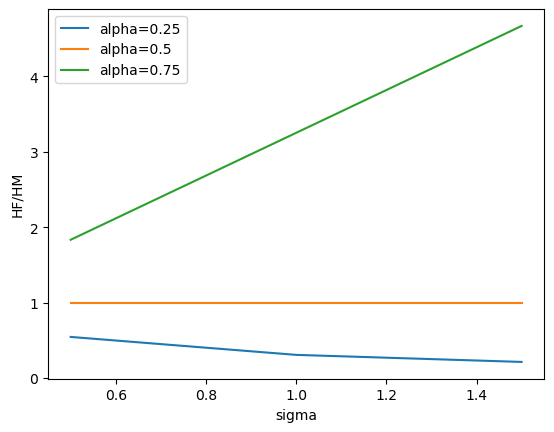

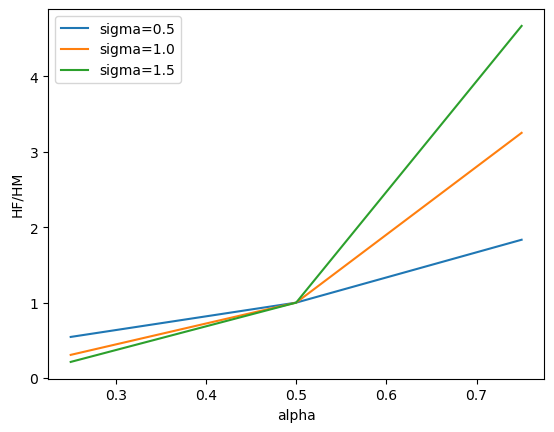

In [90]:
# Define the necessary parameters
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}
resultsHFHNM = {}

# foreach combination of alpha and sigma, print the ratio of optimal HF/HM
for alpha in alpha_list:    
    for sigma in sigma_list:
        # set new values for alpha and sigma
        model = Household.HouseholdSpecializationModelClass()
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        opt = model.solve_discrete()
        # store the result
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM
        resultsHFHNM[(alpha, sigma)] = opt.HF/opt.HM

        # print results
        print(f"with an alpha = {alpha} and a sigma = {sigma}, we get that HF/HM = {opt.HF:.2f} / {opt.HM:.2f} = {opt.HF/opt.HM:.2f}")
                       
# plot the results
fig, ax = plt.subplots()
for alpha in alpha_list:
    y = [resultsHFHNM[(alpha, sigma)] for sigma in sigma_list]
    ax.plot(sigma_list, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

# plot the results 2.0
fig1, ax = plt.subplots()
for sigma in sigma_list:
    y = [resultsHFHNM[(alpha, sigma)] for alpha in alpha_list]
    ax.plot(alpha_list, y, label=f"sigma={sigma}")
ax.set_xlabel("alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

## Interpretation of results in Question 1
The parameter $\alpha$ pertains to the productivity in the home production for females relative to males, $\frac{\alpha}{1-\alpha}$. Call this ratio $\xi$. For the given values of $\alpha$, the productivity in the home production is:
-  $\xi_{\alpha=0.25}=0.25/0.75=0.33$
-  $\xi_{\alpha=0.5}=0.5/0.5=1$
-  $\xi_{\alpha=0.75}=0.75/0.25=3$

For a given elasticity of substition, $\sigma$, the productivity in home production increases as $\alpha$ increases. $\alpha$ illustrates how much home work of women weighs in the total consumption of home production. As the productivity in home production increases in $\alpha$, i.e. when work of women weighs more than work of men, women work more productively at home relative to men. 


For $\alpha$ > 0.5 the return from women working at home is larger than the return from men doing so, and vice versa when $\alpha$ < 0.5. When $\alpha$ = 0.5, the return on home production is the same for men and women. 
In the case where $\alpha $ > 0.5, women will take on a relatively larger part of the home work, as the elasticity of substitution, $\sigma$, increases. Similarly for $\alpha $ < 0.5, men take on a larger part of the home work. 


The elasticity of substitution, $\sigma$, does not affect the ratio of house work of women to house work of men when, so long as the return on women's and men's home work is the same, i.e. $\alpha$ = 0.5.

# Question 2

*Explain the code*
Plot the log(HF/HM) againt the log(wf/wm)

The wages for females are [0.8 0.9 1.  1.1 1.2]
1.25
1.0
1.0
0.8888888888888888
0.8


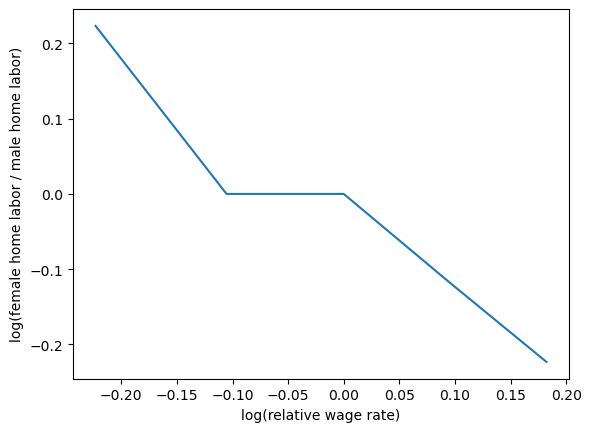

In [85]:
from types import SimpleNamespace
from Household import HouseholdSpecializationModelClass

# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
wf = model.par.wF_vec
print(f"The wages for females are {wf}")
           
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio

    # 5. Print or plot the results
    print(ratio)
   
# 6. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(wf), np.log(temp_ratio)) # the famale wage is the equal to the realtive becuase the wm = 1
plt.xlabel("log(relative wage rate)")
plt.ylabel("log(female home labor / male home labor)")
plt.show()

# Question 3

Repeat the above with a continoues choice set. 

The wages for females are [0.8 0.9 1.  1.1 1.2]
1.2352941176470589
1.0555555555555558
1.0555555555555558
0.9473684210526314
0.85


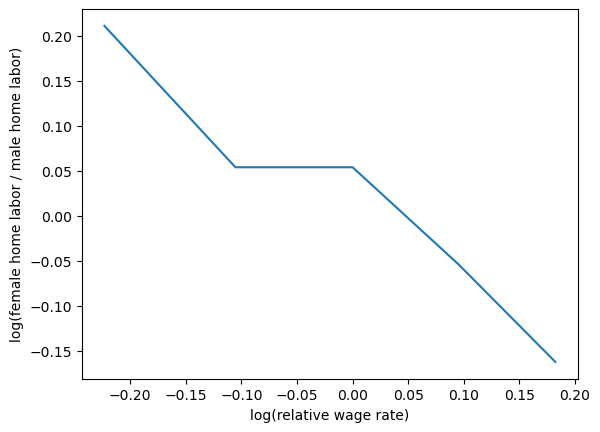

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
from types import SimpleNamespace
from Household import HouseholdSpecializationModelClass 
import Household

# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
wf = model.par.wF_vec
print(f"The wages for females are {wf}")
        
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_continuous()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio

    # 5. Print or plot the results
    print(ratio)
   
# 6. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(wf), np.log(temp_ratio)) # the famale wage is the equal to the realtive becuase the wm = 1
plt.xlabel("log(relative wage rate)")
plt.ylabel("log(female home labor / male home labor)")
plt.show()


# Question 4